In [25]:
from netdeployonnx.client.experiment_helper import (  # noqa: F403
    #get_data_overview,
    load_results,
    math,
    np,
    plt,
    sns,
    stats,
)


In [31]:
df = load_results()
list(df.keys())
df_filtered = df.drop(columns=[
    'experiment',
    'date',
    'samplepoints',
    'option_network_name'
    ])
df_filtered.dtypes

uJ_per_all                         float64
uJ_per_inference                   float64
uJ_per_input_loading                 int64
uJ_per_weights_loading             float64
uW_per_all                         float64
uW_per_inference                   float64
uW_per_input_loading                 int64
uW_per_weights_loading             float64
us_per_all                         float64
us_per_inference                     int64
us_per_input_loading               float64
us_per_weights_loading             float64
option_read_margin                 float64
option_read_margin_enable          float64
option_write_neg_voltage_enable    float64
option_GCR.pclkdiv.cnnclkdiv       float64
option_GCR_pclkdiv.cnnclksel       float64
option_maxpool_en                  float64
option_pool_en                     float64
share_of_weights_loading           float64
dtype: object

In [32]:
def get_data_overview(df_filtered, quantil=0.95):
    metrics = list(df_filtered.keys())

    # Set up the subplots
    fig, axes = plt.subplots(math.ceil(len(metrics)/2), 2, figsize=(14, 12))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot each metric
    for i, metric in enumerate(metrics):
        column_data = df_filtered[metric].dropna()
        sns.histplot(
            data=column_data,
            # x=metric,
            # hue=option,
            # multiple='dodge', # ['layer', 'stack', 'fill', 'dodge']
            ax=axes[i],
            # palette='Set2'
            )
        axes[i].set_title(f'Histogram of {metric}')
        quantile_minus = column_data.quantile(1-quantil)
        quantile_plus = column_data.quantile(quantil)

        if i not in []:#[0, 4, 7]:
            # Overlay the PDF
            mean = column_data.mean()
            std = column_data.std()
            xmin, xmax = axes[i].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            pdf = stats.norm.pdf(x, mean, std)
            axes[i].plot(x, pdf, color='red', label='PDF')

            # Add the quantile bars
            axes[i].axvline(quantile_plus, color='orange', linestyle='--', label='95th Percentile +')
            axes[i].axvline(quantile_minus, color='orange', linestyle='--', label='95th Percentile -')
        else:
            # zoom to the quantile
            axes[i].set_xlim([quantile_minus, quantile_plus])
        axes[i].legend([])


    plt.tight_layout(rect=[0,0,1,0.95])

    # Create a global legend
    # unique_experiments = df_filtered[option].unique()
    # handles = [plt.Line2D([0], [0], color=sns.color_palette('Set2')[i], lw=4) for i in range(len(unique_experiments))]
    # fig.legend(
    #     handles,
    #     unique_experiments,
    #     loc='center',
    #     title='Read Margin',
    #     bbox_to_anchor=(0.52, 0.5)
    #     )  # Adjust location as needed
    plt.suptitle("Effects of the option 'read_margin' on metrics")
    plt.show()


/home/vscode/_Masterarbeit_SS24/hannah-env/service/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/vscode/_Masterarbeit_SS24/hannah-env/service/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/vscode/_Masterarbeit_SS24/hannah-env/service/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/vscode/_Masterarbeit_SS24/hannah-env/service/.venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/vscode/_Masterarbeit_SS24/hannah-env/service/.venv/lib/python3.11/site-packages/sc

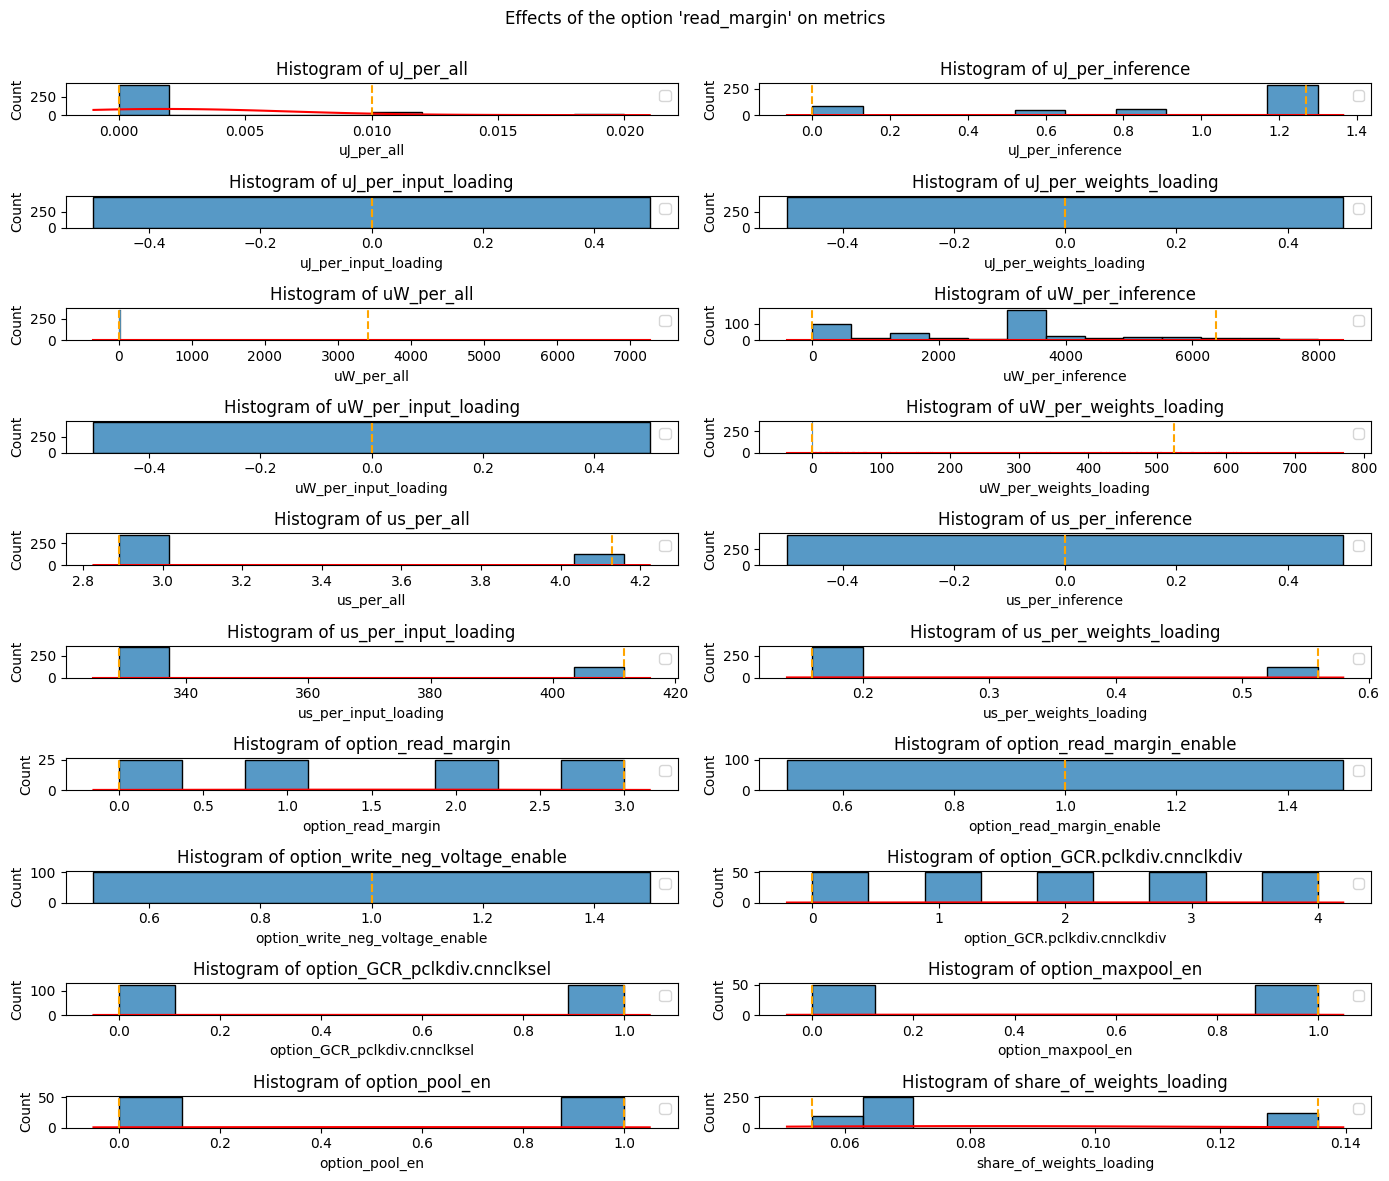

In [33]:
quantil = 0.95
data_overview_plot = get_data_overview(df_filtered)

In [ ]:
option = 'option_GCR.pclkdiv.cnnclkdiv'

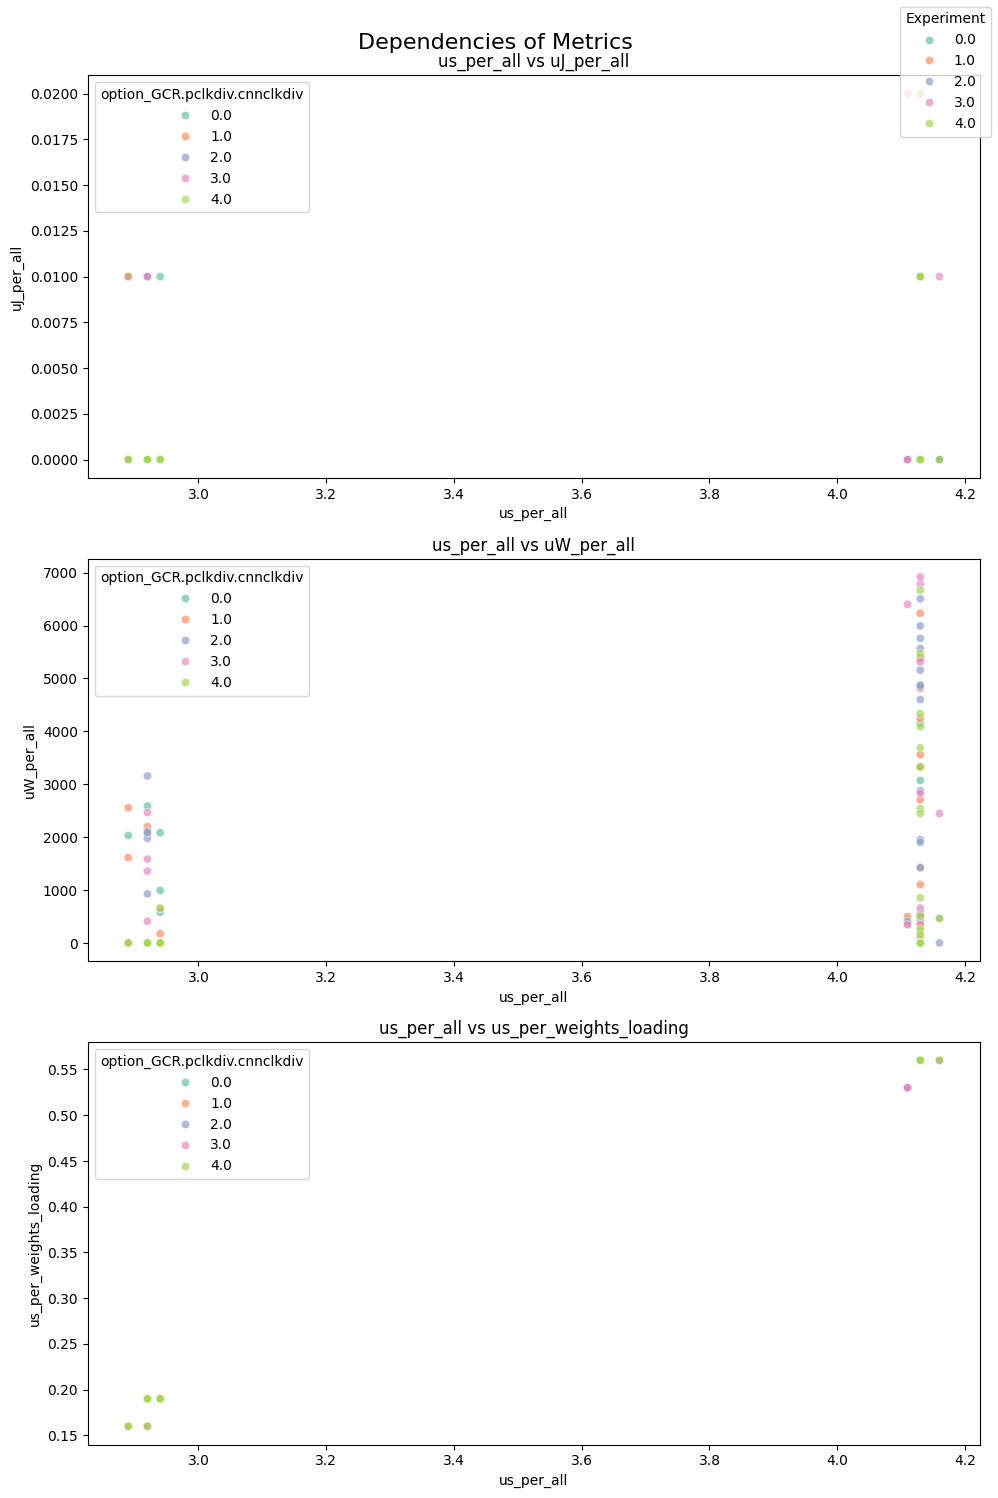

In [229]:
# Define the list of metric pairs for plotting
metric_pairs = [
    ('us_per_all', 'uJ_per_all'),
    ('us_per_all', 'uW_per_all'),
    ('us_per_all', 'us_per_weights_loading'),
]

# Set up subplots based on the number of pairs
fig, axes = plt.subplots(len(metric_pairs), 1, figsize=(10, 5 * len(metric_pairs)))  # Adjust as needed

# Plot each pair
for i, (x_metric, y_metric) in enumerate(metric_pairs):
    sns.scatterplot(data=df_filtered, x=x_metric, y=y_metric, hue=option, ax=axes[i], palette='Set2', alpha=0.7)
    # Set title for each subplot
    axes[i].set_title(f'{x_metric} vs {y_metric}')

# Create a global legend using handles and labels from the first axis
handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first axis
fig.legend(handles, labels, loc='upper right', title='Experiment')

# Set the overall title for the figure
fig.suptitle('Dependencies of Metrics', fontsize=16)

plt.tight_layout()
plt.show()

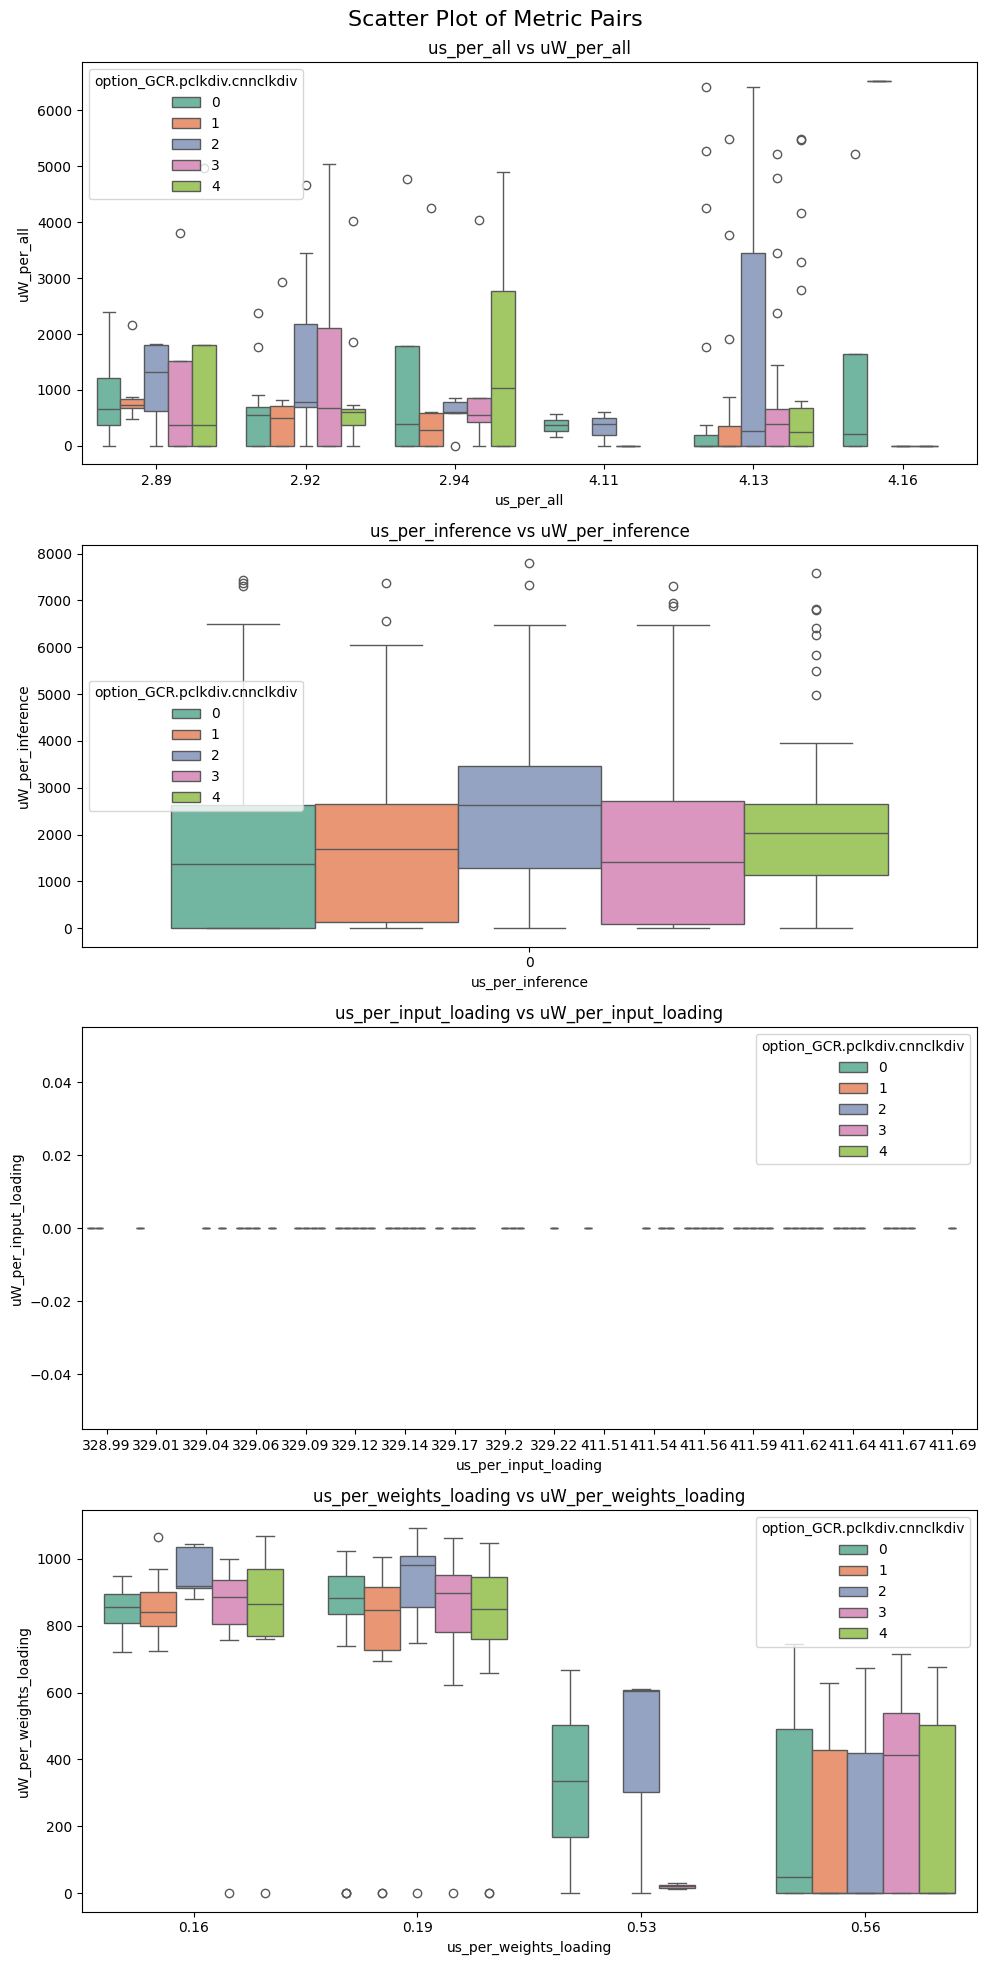

In [ ]:
# Define the list of metric pairs for plotting
metric_pairs = [
    ('us_per_all', 'uW_per_all'),
    ('us_per_inference', 'uW_per_inference'),
    ('us_per_input_loading', 'uW_per_input_loading'),
    ('us_per_weights_loading', 'uW_per_weights_loading'),
]
# Set up subplots based on the number of pairs
fig, axes = plt.subplots(len(metric_pairs), 1, figsize=(10, 5 * len(metric_pairs)))  # Adjust height as needed

# Plot each pair
for i, (x_metric, y_metric) in enumerate(metric_pairs):
    ax1 = axes[i]  # Get the current subplot axis

    # Check if y_metric is a tuple (for dual y-axes)
    if isinstance(y_metric, tuple):
        # Plot the first y metric on the primary y-axis
        y1 = y_metric[0]
        sns.boxplot(
            data=df_filtered, x=x_metric, y=y1, ax=ax1,
            hue=option,
            # label=y1,
            palette='Set2',
            # alpha=0.7,
            # multiple='dodge',
            )

        # Create a second y-axis for the second metric
        ax2 = ax1.twinx()  # Create a twin y-axis
        y2 = y_metric[1]
        sns.boxplot(
            data=df_filtered, x=x_metric, y=y2, ax=ax2,
            hue=option,
            # label=y2,
            palette='Set2',
            # alpha=0.7,
            # multiple='dodge',
            )
    else:
        # Plot the single y metric on the primary y-axis
        sns.boxplot(
            data=df_filtered, x=x_metric, y=y_metric, ax=ax1,
            hue=option,
            # label=y_metric,
            palette='Set2',
            # alpha=0.7,
            # multiple='dodge',
            )

    # Set title for each subplot
    ax1.set_title(f'{x_metric} vs {y_metric if not isinstance(y_metric, tuple) else y_metric[0]}')

# Set title for the overall plot
plt.suptitle('Scatter Plot of Metric Pairs', fontsize=16)

# Create a global legend using handles and labels from the plot
# handles, labels = plt.gca().get_legend_handles_labels()  # Get handles and labels from the current axis
# plt.legend(handles, labels, title='Experiment', loc='upper right')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

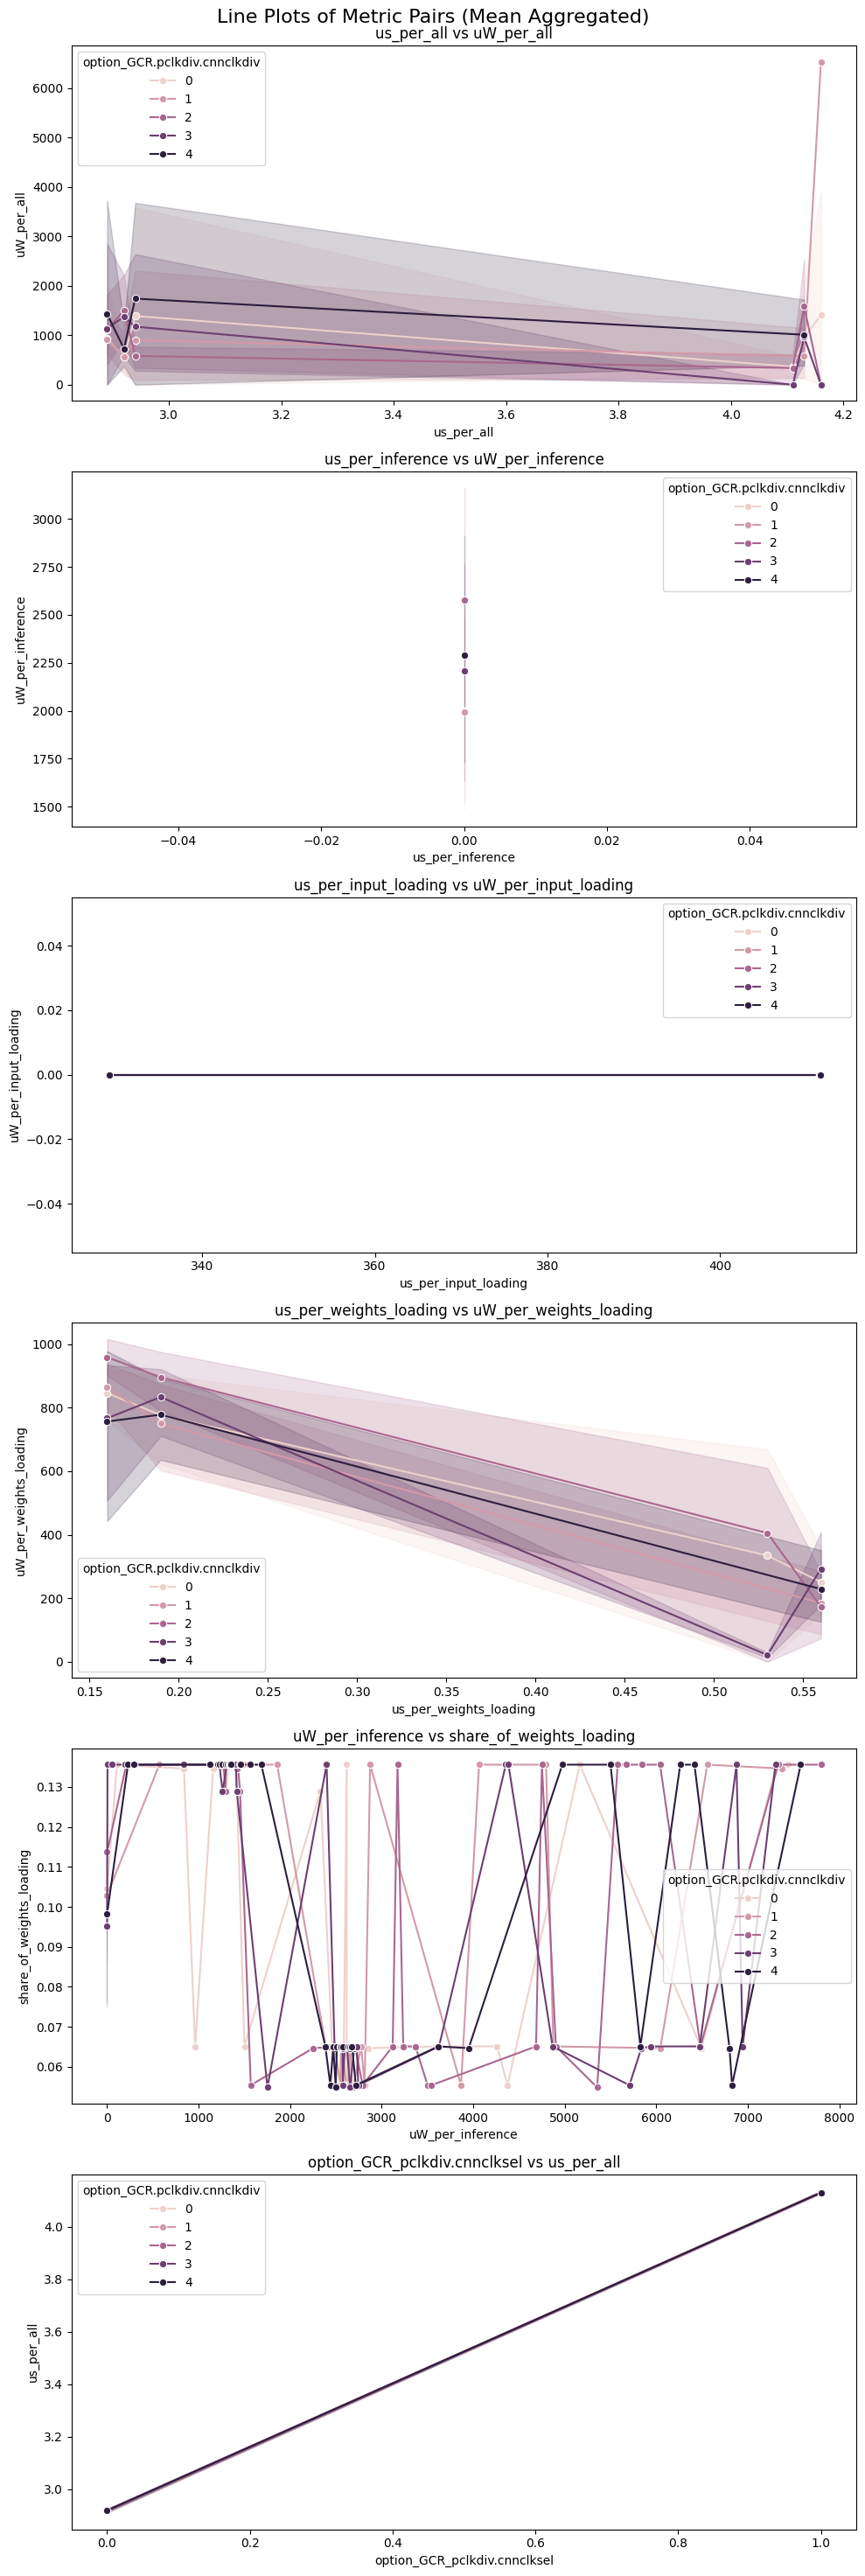

In [ ]:
metric_pairs2 = metric_pairs +[
    ('uW_per_inference', 'share_of_weights_loading'),
    ('option_GCR_pclkdiv.cnnclksel', 'us_per_all'),
]

# Set up the plot
fig, axes = plt.subplots(len(metric_pairs2), 1, figsize=(10, 5 * len(metric_pairs2)))  # Adjust height as needed

# Plot each pair
for i, (x_metric, y_metric) in enumerate(metric_pairs2):
    ax = axes[i]  # Get the current subplot axis
    
    # Group by the x metric and calculate the mean for the y metric(s)
    if isinstance(y_metric, tuple):
        y1 = y_metric[0]
        y2 = y_metric[1]

        # Group and calculate means
        mean_df1 = df_filtered.groupby(x_metric, as_index=False)[y1].mean()
        mean_df2 = df_filtered.groupby(x_metric, as_index=False)[y2].mean()

        # Plot the first metric
        sns.lineplot(data=mean_df1, x=x_metric, y=y1, ax=ax, hue=option, marker='o')
        
        # Plot the second metric on the same axis
        sns.lineplot(data=mean_df2, x=x_metric, y=y2, ax=ax, hue=option, marker='o')
        
    else:
        if y_metric == option:
            # Group and calculate means
            mean_df = df_filtered.groupby([x_metric, option], as_index=False)[y_metric].mean()
            sns.lineplot(data=mean_df, x=x_metric, y=y_metric, ax=ax, marker='o')
        else:
            # Group and calculate means
            mean_df = df_filtered.groupby([x_metric, option], as_index=False)[y_metric].mean()
            sns.lineplot(data=df_filtered, x=x_metric, y=y_metric, ax=ax, hue=option, marker='o')

    # Set title for each subplot
    ax.set_title(f'{x_metric} vs {y_metric if not isinstance(y_metric, tuple) else y_metric[0]}')

# Set the overall title for the figure
fig.suptitle('Line Plots of Metric Pairs (Mean Aggregated)', fontsize=16)

# # Create a global legend using handles and labels from the first subplot
# handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first subplot
# fig.legend(handles, labels, title='Metrics', loc='upper right')

plt.tight_layout(rect=[0,0,1,0.99])
plt.show()